# Property Price Prediction

## Abstract:
A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on. 
## Problem Statement: 
Use regression analysis to predict the price of a property

## Steps
1. Assign Working Directory
2. Import necessary libraries
3. Import dataset
3. Split: Train Test Split
4. Basic commands
5. Impute: Imputing missing values
6. Exploratory Data Analysis
7. Scaling numerical variables and encoding categorical variables
8. Relationship between columns
9. Feature Selection
10. Principal Component Analysis
11. Model: train machine learning algorithms
    * Linear regression

# Assign Working Directory

In [1]:
import os
os.chdir('C:/Users/Darshan/Desktop/property_price_prediction_project')

# Import necessary libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import linregress

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [3]:
# Setting pandas options

pd.options.display.max_rows = 90
pd.options.display.max_columns = 90
pd.set_option('display.max_colwidth', -1)

# Import Dataset

In [4]:
df = pd.read_csv('C:/Users/Darshan/Desktop/property_price_prediction_project/Dataset/HousePrices.csv')

In [5]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Importing the description datasets for understanding the columns better

df_desc = pd.read_csv('C:/Users/Darshan/Desktop/property_price_prediction_project/Dataset/desc.csv', header=None)
df_desc.index = df_desc[0]
df_desc.drop(labels=[0], axis=1, inplace=True)
df_desc.columns = ['description']
df_desc.head()

,description
0,
Id,Identification number of the property
Dwell_Type,Identifies the type of dwelling involved in the sale
Zone_Class,Identifies the general zoning classification of the sale
LotFrontage,Linear feet of street-connected to the property
LotArea,"Lot size is the lot or parcel side where it adjoins a street, boulevard or access way"


# Basic Commands

In [7]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2073.0,916.132176,493.014670,1.0,519.0,932.0,1302.0,1820.0
Dwell_Type,2073.0,60.556199,159.924810,20.0,20.0,50.0,70.0,7080.0
LotFrontage,1753.0,72.056475,27.987475,21.0,60.0,70.0,83.0,313.0
LotArea,2073.0,10717.853353,9215.982306,1300.0,7620.0,9492.0,11601.0,215245.0
OverallQual,2073.0,6.233478,1.517115,1.0,5.0,6.0,7.0,10.0
OverallCond,2073.0,5.835022,1.360214,1.0,5.0,5.0,7.0,9.0
YearBuilt,2073.0,1969.445731,30.222647,1872.0,1950.0,1971.0,1999.0,2010.0
YearRemodAdd,2073.0,1986.617463,20.432694,1950.0,1970.0,1995.0,2004.0,2023.0
MasVnrArea,2059.0,101.875668,179.169217,0.0,0.0,0.0,161.5,1600.0
BsmtFinSF1,2073.0,437.949349,448.051119,0.0,0.0,381.0,708.0,5644.0


In [10]:
df.isnull().sum()

# There are some null values in some columns

Id                     0   
Dwell_Type             0   
Zone_Class             0   
LotFrontage            320 
LotArea                0   
Road_Type              0   
Alley                  1944
Property_Shape         0   
LandContour            0   
Utilities              0   
LotConfig              0   
LandSlope              0   
Neighborhood           0   
Condition1             0   
Condition2             0   
Dwelling_Type          0   
HouseStyle             0   
OverallQual            0   
OverallCond            0   
YearBuilt              0   
YearRemodAdd           0   
RoofStyle              0   
RoofMatl               0   
Exterior1st            0   
Exterior2nd            0   
MasVnrType             14  
MasVnrArea             14  
ExterQual              0   
ExterCond              0   
Foundation             0   
BsmtQual               59  
BsmtCond               59  
BsmtExposure           61  
BsmtFinType1           59  
BsmtFinSF1             0   
BsmtFinType2        

In [11]:
# Lets see the percent of null values in each columns.

round((df.isnull().sum()/len(df))*100,2)

Id                     0.00 
Dwell_Type             0.00 
Zone_Class             0.00 
LotFrontage            15.44
LotArea                0.00 
Road_Type              0.00 
Alley                  93.78
Property_Shape         0.00 
LandContour            0.00 
Utilities              0.00 
LotConfig              0.00 
LandSlope              0.00 
Neighborhood           0.00 
Condition1             0.00 
Condition2             0.00 
Dwelling_Type          0.00 
HouseStyle             0.00 
OverallQual            0.00 
OverallCond            0.00 
YearBuilt              0.00 
YearRemodAdd           0.00 
RoofStyle              0.00 
RoofMatl               0.00 
Exterior1st            0.00 
Exterior2nd            0.00 
MasVnrType             0.68 
MasVnrArea             0.68 
ExterQual              0.00 
ExterCond              0.00 
Foundation             0.00 
BsmtQual               2.85 
BsmtCond               2.85 
BsmtExposure           2.94 
BsmtFinType1           2.85 
BsmtFinSF1    

# Imputing Missing Values

### Droping columns above 40 percent of missing data

In [12]:
# Columns having more than 40% missing values

# selecting all the columns from the command from the above command
missing_percent = round((df.isnull().sum()/len(df))*100,2)

# selecting all the columns with missing values above 40 percent 
missing_above_40 = missing_percent[missing_percent>40]
print('Amount of null values above 40%')
missing_above_40

Amount of null values above 40%


Alley          93.78
FireplaceQu    47.66
PoolQC         99.61
Fence          80.51
MiscFeature    96.14
dtype: float64

In [13]:
df[missing_above_40.index.values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Alley        129 non-null    object
 1   FireplaceQu  1085 non-null   object
 2   PoolQC       8 non-null      object
 3   Fence        404 non-null    object
 4   MiscFeature  80 non-null     object
dtypes: object(5)
memory usage: 81.1+ KB


In [14]:
df_desc.loc['Alley']

description    Type of alley access to the property
Name: Alley, dtype: object

In [15]:
df_desc.loc['FireplaceQu']

description    Fireplace quality
Name: FireplaceQu, dtype: object

In [16]:
df_desc.loc['PoolQC']

description    Pool quality
Name: PoolQC, dtype: object

In [17]:
df_desc.loc['Fence']

description    Fence quality
Name: Fence, dtype: object

In [18]:
df_desc.loc['MiscFeature']

description    Miscellaneous feature not covered in other categories
Name: MiscFeature, dtype: object

In [19]:
# Droping the columns with missing values above 40 percent in the training set

df.drop(missing_above_40.index.values, axis=1, inplace=True)

### Understanding columns which have NA values

In [20]:
# We removed all the null values above 40 percent. Now we can inspect other columns with null values.


# Selecting only the columns with null values

cols_with_null = df.isnull().sum()[df.isnull().sum()!=0].index.values

In [21]:
cols_with_null

# These are the columns with null values.

array(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'], dtype=object)

In [22]:
df[cols_with_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1753 non-null   float64
 1   MasVnrType    2059 non-null   object 
 2   MasVnrArea    2059 non-null   float64
 3   BsmtQual      2014 non-null   object 
 4   BsmtCond      2014 non-null   object 
 5   BsmtExposure  2012 non-null   object 
 6   BsmtFinType1  2014 non-null   object 
 7   BsmtFinType2  2013 non-null   object 
 8   Electrical    2072 non-null   object 
 9   GarageType    1960 non-null   object 
 10  GarageYrBlt   1960 non-null   float64
 11  GarageFinish  1960 non-null   object 
 12  GarageQual    1960 non-null   object 
 13  GarageCond    1960 non-null   object 
dtypes: float64(3), object(11)
memory usage: 226.9+ KB


In [23]:
# Before starting to inspect the columns with null values to make the process easy we can define a function
# to make plots and print out some details of the column.

def understand_na_cols(col_name):
    '''
    Accepts a column name and prints out the 
    detals about that column'''
    
    # prints the description of the column
    print(df_desc.loc[col_name],'\n')
    
    # prints the number of null values in the column
    print('Number of null values: ', df[col_name].isnull().sum())
    
    # prints the percent of null values in the column
    print('Percent of null values: ', round((df[col_name].isnull().sum()/len(df))*100,2), '%\n')
    
    # Checking if the column is numerical or categorical
    if df[col_name].dtypes != 'O':
        # This line will run only if the datatype of the column is numerical
        
        # print the descrptive statistics of the column
        print(f'Descriptive Statistics of {col_name} \n', df[col_name].describe())
        
        # plots the histogram of the column
        sns.distplot(df[col_name])
        plt.title(f'Histogram of {col_name}')
    else:
        # This line will run only if the datatype of the column is categorical
        
        # prints out the number of levels in column
        print('Levels: \n',df[col_name].value_counts(),'\n')
        
        # plots the countplot of the column
        sns.countplot(df[col_name])
        plt.title(f'Countplot of {col_name}')

In [24]:
# We have to fill the missing values based on mean, median and mode
# So while inspecting the column we can find out which of the strategy(mean, median or mode) should be used to 
# fill the null values.

# After finding out which strategy to use, we will note that inside a dictionary for using at the time of filling 
# missing values.

# So lets create an empty dictionary called strategy.

strategy = {}

#### LotFrontage

description    Linear feet of street-connected to the property
Name: LotFrontage, dtype: object 

Number of null values:  320
Percent of null values:  15.44 %

Descriptive Statistics of LotFrontage 
 count    1753.000000
mean     72.056475  
std      27.987475  
min      21.000000  
25%      60.000000  
50%      70.000000  
75%      83.000000  
max      313.000000 
Name: LotFrontage, dtype: float64


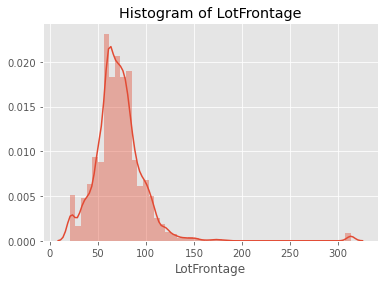

In [25]:
# Understanding all the columns with missing values

understand_na_cols('LotFrontage')

**Insight : Use median to fill NA values of LotFrontage column

In [26]:
# Based on the details and histogram of 'LotFrontage' column, we can use median to fill its missing values.

# So lets take a note of that and pass in into our 'stategy' dictionary.

strategy['median'] = ['LotFrontage']

#### MasVnrType

description    Masonry veneer type
Name: MasVnrType, dtype: object 

Number of null values:  14
Percent of null values:  0.68 %

Levels: 
 None       1233
BrkFace    620 
Stone      186 
BrkCmn     20  
Name: MasVnrType, dtype: int64 



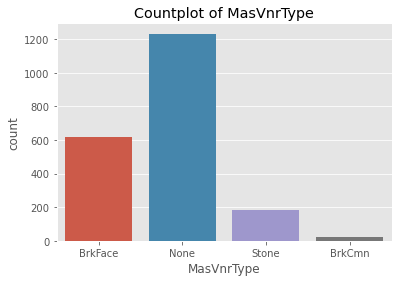

In [27]:
understand_na_cols('MasVnrType')

* BrkCmn - Brick Common 
* BrkFace - Brick Face 
* CBlock - Cinder Block 
* None - None 
* Stone - Stone

**Insight : Use mode to fill missing values of 'MasVnrType' column

In [28]:
strategy['mode'] = ['MasVnrType']

#### MasVnrArea

description    Masonry veneer area in square feet
Name: MasVnrArea, dtype: object 

Number of null values:  14
Percent of null values:  0.68 %

Descriptive Statistics of MasVnrArea 
 count    2059.000000
mean     101.875668 
std      179.169217 
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      161.500000 
max      1600.000000
Name: MasVnrArea, dtype: float64


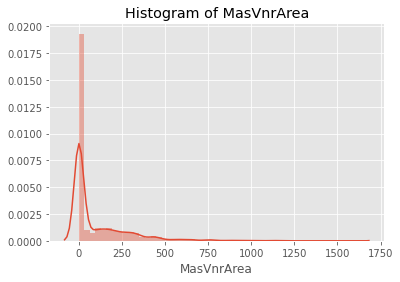

In [29]:
understand_na_cols('MasVnrArea')

In [30]:
df.groupby('MasVnrType').mean()['MasVnrArea']

MasVnrType
BrkCmn     228.450000
BrkFace    257.074194
None       0.768045  
Stone      241.182796
Name: MasVnrArea, dtype: float64

**Insight : Use mode to fill Na values of MasVnrArea column

In [31]:
strategy['mode'].append('MasVnrArea')

#### BsmtQual

description    Evaluates the height of the basement
Name: BsmtQual, dtype: object 

Number of null values:  59
Percent of null values:  2.85 %

Levels: 
 Gd    904
TA    891
Ex    169
Fa    50 
Name: BsmtQual, dtype: int64 



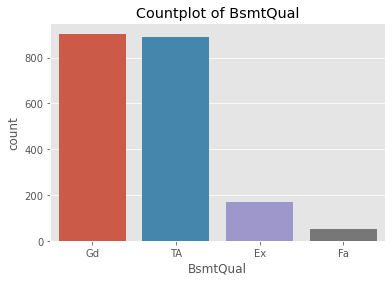

In [32]:
understand_na_cols('BsmtQual')

* Ex Excellent (100+ inches) 
* Gd Good (90-99 inches) 
* TA Typical (80-89 inches) 
* Fa Fair (70-79 inches) 
* Po Poor (<70 inches NA No Basement

**Insight : Use mode to fill missing values

In [33]:
strategy['mode'].append('BsmtQual')

#### BsmtCond

description    Evaluates the general condition of the basement
Name: BsmtCond, dtype: object 

Number of null values:  59
Percent of null values:  2.85 %

Levels: 
 TA    1851
Gd    100 
Fa    61  
Po    2   
Name: BsmtCond, dtype: int64 



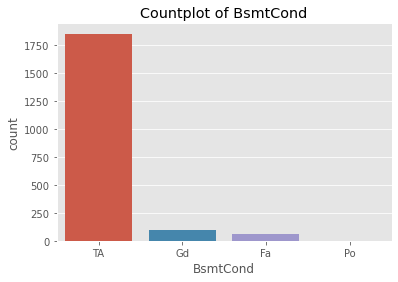

In [34]:
understand_na_cols('BsmtCond')

* Ex Excellent 
* Gd Good 
* TA Typical - slight dampness allowed 
* Fa Fair - dampness or some cracking or settling
* Po Poor - Severe cracking, settling, or wetness 
* NA No Basement

**Insight : Use mode to fill missing values in BsmtCond columns

In [35]:
strategy['mode'].append('BsmtCond')

#### BsmtExposure

description    Refers to walkout or garden level walls
Name: BsmtExposure, dtype: object 

Number of null values:  61
Percent of null values:  2.94 %

Levels: 
 No    1349
Av    322 
Gd    181 
Mn    160 
Name: BsmtExposure, dtype: int64 



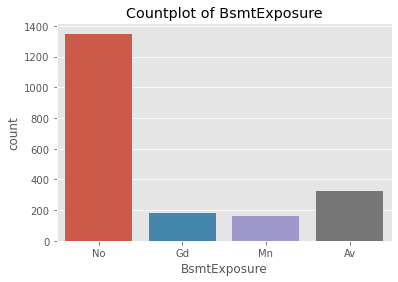

In [36]:
understand_na_cols('BsmtExposure')

* Gd Good Exposure 
* Av Average Exposure (split levels or foyers typically score average or above) 
* Mn Minimum Exposure 
* No No Exposure 
* NA No Basement

**Insight : Use mode to fill missing data in BsmtExposure colulmn

In [37]:
strategy['mode'].append('BsmtExposure')

#### BsmtFinType1

description    Rating of basement finished area
Name: BsmtFinType1, dtype: object 

Number of null values:  59
Percent of null values:  2.85 %

Levels: 
 Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
Name: BsmtFinType1, dtype: int64 



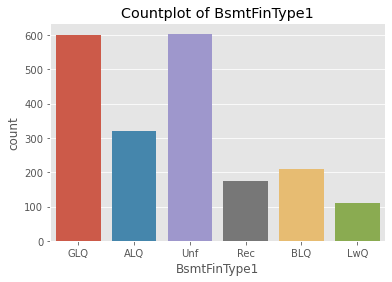

In [38]:
understand_na_cols('BsmtFinType1')

* GLQ Good Living Quarters 
* ALQ Average Living Quarters 
* BLQ Below Average Living Quarters 
* Rec Average Rec Room 
* LwQ Low Quality 
* Unf Unfinished
* NA No Basement

**Insight : Use mode to fill the missing values in BsmtFinType1

In [39]:
strategy['mode'].append('BsmtFinType1')

#### BsmtFinType2 

description    Rating of basement finished area (if multiple types)
Name: BsmtFinType2, dtype: object 

Number of null values:  60
Percent of null values:  2.89 %

Levels: 
 Unf    1770
Rec    79  
LwQ    68  
BLQ    50  
ALQ    24  
GLQ    22  
Name: BsmtFinType2, dtype: int64 



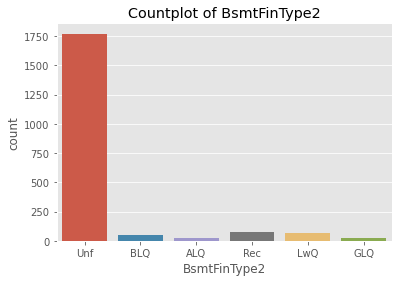

In [40]:
understand_na_cols('BsmtFinType2')

* GLQ Good Living Quarters 
* ALQ Average Living Quarters 
* BLQ Below Average Living Quarters 
* Rec Average Rec Room 
* LwQ Low Quality 
* Unf Unfinished 
* NA No Basement

**Insight : Use mode to fill missing values in BsmtFinType2

In [41]:
strategy['mode'].append('BsmtFinType2')

#### FireplaceQu

#### GarageType

description    Garage location
Name: GarageType, dtype: object 

Number of null values:  113
Percent of null values:  5.45 %

Levels: 
 Attchd     1252
Detchd     537 
BuiltIn    124 
Basment    27  
CarPort    12  
2Types     8   
Name: GarageType, dtype: int64 



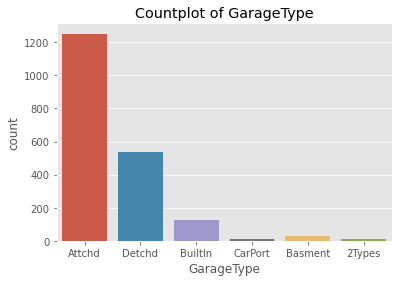

In [42]:
understand_na_cols('GarageType')

**Insight : Use mode to fill missing values of GarageType column

In [43]:
strategy['mode'].append('GarageType')

#### GarageYrBlt

description    Year garage was built
Name: GarageYrBlt, dtype: object 

Number of null values:  113
Percent of null values:  5.45 %

Descriptive Statistics of GarageYrBlt 
 count    1960.000000
mean     1980.418367
std      24.158327  
min      1906.000000
25%      1963.000000
50%      1984.000000
75%      2003.000000
max      2019.000000
Name: GarageYrBlt, dtype: float64


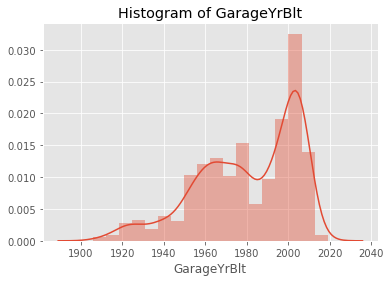

In [44]:
understand_na_cols('GarageYrBlt')

**Insight Use mode to fill missing values of GarageYrBlt column

In [45]:
strategy['mode'].append('GarageYrBlt')

#### GarageFinish

description    Interior finish of the garage
Name: GarageFinish, dtype: object 

Number of null values:  113
Percent of null values:  5.45 %

Levels: 
 Unf    857
RFn    605
Fin    498
Name: GarageFinish, dtype: int64 



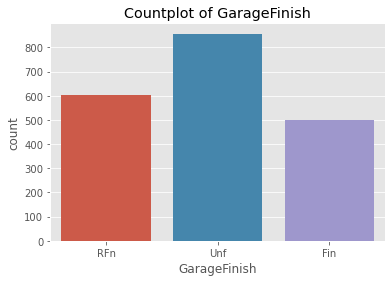

In [46]:
understand_na_cols('GarageFinish')

**Insight : Use mode to fill missing values of GarageFinish columns

In [47]:
strategy['mode'].append('GarageFinish')

#### GarageQual

description    Garage quality
Name: GarageQual, dtype: object 

Number of null values:  113
Percent of null values:  5.45 %

Levels: 
 TA    1870
Fa    65  
Gd    18  
Ex    4   
Po    3   
Name: GarageQual, dtype: int64 



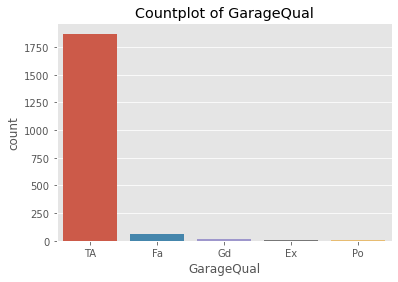

In [48]:
understand_na_cols('GarageQual')

**Insight : Use mode to fill the missing values of GarageQual column

In [49]:
strategy['mode'].append('GarageQual')

#### GarageCond

description    Garage condition
Name: GarageCond, dtype: object 

Number of null values:  113
Percent of null values:  5.45 %

Levels: 
 TA    1885
Fa    47  
Gd    17  
Po    8   
Ex    3   
Name: GarageCond, dtype: int64 



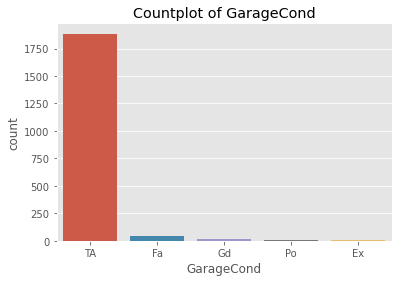

In [50]:
understand_na_cols('GarageCond')

**Insight : Use mode to fill missing values of GarageCond column

In [51]:
strategy['mode'].append('GarageCond')

### Imputing missing values

In [52]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [53]:
df.shape

(2073, 76)

In [54]:
# Now lets check which strategy to use for imputation of missing values in respective columns

strategy

{'median': ['LotFrontage'],
 'mode': ['MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond']}

In [55]:
df.isnull().sum()

Id                     0  
Dwell_Type             0  
Zone_Class             0  
LotFrontage            320
LotArea                0  
Road_Type              0  
Property_Shape         0  
LandContour            0  
Utilities              0  
LotConfig              0  
LandSlope              0  
Neighborhood           0  
Condition1             0  
Condition2             0  
Dwelling_Type          0  
HouseStyle             0  
OverallQual            0  
OverallCond            0  
YearBuilt              0  
YearRemodAdd           0  
RoofStyle              0  
RoofMatl               0  
Exterior1st            0  
Exterior2nd            0  
MasVnrType             14 
MasVnrArea             14 
ExterQual              0  
ExterCond              0  
Foundation             0  
BsmtQual               59 
BsmtCond               59 
BsmtExposure           61 
BsmtFinType1           59 
BsmtFinSF1             0  
BsmtFinType2           60 
BsmtFinSF2             0  
BsmtUnfSF              0  
T

In [56]:
def fill_na_values(df):
    '''
    Accepts the dataframe and fills all the null values inplace.'''
    for key in strategy.keys():
        for col in strategy[key]:
            if key == 'median':
                median = df[col].median()
                df[col].fillna(value=median, inplace=True)
            elif key == 'mode':
                mode = df[col].mode()[0]
                df[col].fillna(value=mode, inplace=True)
    
    df.dropna(axis=0,inplace=True)

In [57]:
fill_na_values(df)

In [58]:
df.isnull().sum().sum()

0

In [59]:
# Here we are dividing the whole dataset into independent variables(X) and dependent variable(y)

# Here we are selecting all the columns except the last column('Property_Sales_Price')
X = df.iloc[:,:-1]

# Only selecting the last column('Property_Sales_Price')
y = df.iloc[:,-1]

In [60]:
X.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wood

In [61]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: Property_Sale_Price, dtype: int64

In [62]:
# The train-test split procedure is used to estimate the performance of machine learning algorithms when 
# they are used to make predictions on data not used to train the model.

In [63]:
# The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model
# and is referred to as the training dataset. The second subset is not used to train the model; instead, 
# the input element of the dataset is provided to the model, then predictions are made and compared to the 
# expected values. This second dataset is referred to as the test dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape

(1657, 75)

In [65]:
X_test.shape

(415, 75)

# Exploratory Data Analysis(EDA)

### Basic EDA

In [66]:
X_eda = pd.concat([X_train, y_train], axis=1)

In [67]:
X_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 1432 to 860
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1657 non-null   int64  
 1   Dwell_Type           1657 non-null   int64  
 2   Zone_Class           1657 non-null   object 
 3   LotFrontage          1657 non-null   float64
 4   LotArea              1657 non-null   int64  
 5   Road_Type            1657 non-null   object 
 6   Property_Shape       1657 non-null   object 
 7   LandContour          1657 non-null   object 
 8   Utilities            1657 non-null   object 
 9   LotConfig            1657 non-null   object 
 10  LandSlope            1657 non-null   object 
 11  Neighborhood         1657 non-null   object 
 12  Condition1           1657 non-null   object 
 13  Condition2           1657 non-null   object 
 14  Dwelling_Type        1657 non-null   object 
 15  HouseStyle           1657 non-null  

In [68]:
X_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1657.0,915.260712,492.167472,1.0,521.0,932.0,1293.0,1820.0
Dwell_Type,1657.0,61.605311,177.629452,20.0,20.0,50.0,70.0,7080.0
LotFrontage,1657.0,71.529270,26.095940,21.0,60.0,70.0,80.0,313.0
LotArea,1657.0,10773.739288,9902.239915,1300.0,7599.0,9525.0,11619.0,215245.0
OverallQual,1657.0,6.209415,1.526405,1.0,5.0,6.0,7.0,10.0
OverallCond,1657.0,5.843693,1.366109,1.0,5.0,5.0,7.0,9.0
YearBuilt,1657.0,1969.250453,30.202967,1872.0,1950.0,1971.0,1999.0,2010.0
YearRemodAdd,1657.0,1986.347013,20.503851,1950.0,1969.0,1995.0,2004.0,2023.0
MasVnrArea,1657.0,99.622209,175.104561,0.0,0.0,0.0,154.0,1378.0
BsmtFinSF1,1657.0,438.222692,450.485663,0.0,0.0,380.0,713.0,5644.0


### Some Useful Functions

In [69]:
# Lets create a variable called action which is similar to strategy variable. Here we will record which columns to drop and
# which columns to use scalers and transformers.

# We can create set objects inside the dictionary to fill with column names. because we dont want our column names to be
# repeated for the same process.

# Set items are unordered, unchangeable, and do not allow duplicate values.

act_drop = set()
act_power = set()
act_quant = set()
act_rob = set()
act_std = set()
act_ohe = set()

action = {
    'drop' : act_drop,
    'power_t' : act_power,
    'quantile_t' : act_quant,
    'robust_s' : act_rob,
    'standard_s' : act_std,
    'one_hot' : act_ohe
}

In [70]:
# Same process to record the numerical columns with different correlations

# I divided the correlation values into three groups

h_set=set()
m_set=set()
l_set=set()

correlation = {
    'high(6-10)' : h_set,
    'medium(3-6)' : m_set,
    'low(0-3)' : l_set
}

In [71]:
def uni_var_analysis(col_name):
    print(f'Basic EDA of {col_name}\n')
    print(df_desc.loc[col_name])
    print('\n')
    
    if X_eda[col_name].dtypes != 'O':
        
        fig, axes = plt.subplots(1,2, figsize=(17,7))
        fig.suptitle(f'Histogram and Probability plot for {col_name}')
        sns.distplot(ax=axes[0], a=X_eda[col_name], fit=norm)
        axes[1] = stats.probplot(X_eda[col_name], plot=plt)
        plt.savefig(f'plots/uni_var_plot_of_{col_name}.png')
        print('\n')
        
        Q1 = X_eda[col_name].quantile(0.25)
        Q3 = X_eda[col_name].quantile(0.75)
        IQR = Q3 - Q1
        no_of_out = sum((X_eda[col_name] < (Q1 - 1.5 * IQR)) |(X_eda[col_name] > (Q3 + 1.5 * IQR)))
        print(f'There are {no_of_out} outliers in the {col_name} column.')
        print('\n')

        print('Skewness: ', X_eda[col_name].skew())
        print('Kurtosis: ', X_eda[col_name].kurtosis())
        print('\n')

        print('Test for Normality: ')
        Ho = 'There is no significant departure from normal bell shaped curve (Data is normal)'
        Ha = 'There is a significant departure from normal bell shaped curve (Data is not normal)'
        print('Ho : ', Ho)
        print('Ha : ', Ha)
        print('\n')
        stat, p = shapiro(X_eda[col_name])
        
        print('Test Results')
        print('test statistics: %.3f' %stat)
        print('p value: %.6f' %p)
        print('\n')
        alpha = 0.05
        
        if p>alpha:
            print(f'{Ho} : fail to reject Ho')
            if no_of_out>0:
                action['robust_s'].add(col_name)
            else:
                action['standard_s'].add(col_name)
        else:
            print(f'{Ha} : reject Ho')
            
            if no_of_out>0:
                action['quantile_t'].add(col_name)
            else:
                action['power_t'].add(col_name)
                
                
    elif X_eda[col_name].dtypes == 'O':
        
        plt.figure(figsize=(9,7))
        sns.countplot(X_eda[col_name])
        plt.title(f'Countplot of {col_name}')
        plt.savefig(f'plots/uni_var_plot_of_{col_name}.png')

        print(f'Unique values in {col_name} are {X_eda[col_name].unique()}\n')
        
        print(X_eda[col_name].value_counts())
    

In [75]:
def bi_var_analysis(x,data=X_eda, y='Property_Sale_Price', convert=False):
    print(f'Relationship between {x} and {y}\n')

    print(df_desc.loc[x],'\n')
    print(df_desc.loc[y])
    print('\n')
    
    if convert:
        if data[x].dtypes != 'O':
            data[x] = data[x].astype('object')
        else:
            pass
    
    if y=='Property_Sale_Price' and x!='Property_Sale_Price':
        if data[x].dtypes != 'O':
            if x in action['quantile_t'] or x in action['power_t']:
                print('Since the data is not normally distributed we are using Spearman correlation coeffiecient.')
                corr, _ = spearmanr(data[x], data[y])
                print('Spearmans correlation: %.3f' % corr)
                    
            else:
                corr, _ = pearsonr(data[x], data[y])
                print('Pearsons correlation: %.3f' % corr)
                
            corr = abs(corr)
            if corr>=0.6:
                correlation['high(6-10)'].add(x)
            elif corr>=0.3 and corr<0.6:
                correlation['medium(3-6)'].add(x)
            elif corr>=0 and corr<0.3:
                correlation['low(0-3)'].add(x)
            
            print('\n')
            print(f'Lets see the relation between {x} and {y} using Wald Test with t-distribution of the test statistic.')
            print('\n')
            Ho = 'Slope is 0 (The regression model has no predictability of the dependent variable)'
            Ha = 'Slope not equal to 0 (The regressioin model can predict the dependent variable)'
            print('Ho: ',Ho)
            print('Ha: ',Ha)
            print('\n')
            
            lin_scale_demo = RobustScaler()
            demo_df = pd.DataFrame(lin_scale_demo.fit_transform(data[[x,y]]), columns=[x,y])
            demo_lr = linregress(demo_df[x], demo_df[y])
            
            print('Test Results\n')
            print('Slope: ', demo_lr.slope)
            print('Intercept: ', demo_lr.intercept)
            print('R-value: ', demo_lr.rvalue)
            print('p-value: ', demo_lr.pvalue)
            print('Std error: ', demo_lr.stderr)
            print('\n')
            
            alpha = 0.05
            if demo_lr.pvalue>alpha:
                print('Fail to reject Null hypothesis, ', Ho)
                action['drop'].add(x)
            else:
                print('Reject Null hypothesis, ', Ha)
            
            fig, axes = plt.subplots(1,2, figsize=(15,7))
            sns.scatterplot(x=x, y=y, data=data, ax=axes[0])
            sns.regplot(x=x,y=y,data=data,ax=axes[1])
            plt.suptitle(f'Scatterplot and Regression plot of {x} vs {y}')
            plt.savefig(f'plots/bi_var_plot_of_{x}_vs_{y}.png')

            
        elif data[x].dtypes == 'O':
            
            unique = data[x].unique()
            print(f'Unique values in {x} are : {unique}')
            print('\n')
            
            Ho = f'All the levels in {x} have an equal mean {y}'
            Ha = f'There is a significant difference between the levels of {x} with respect to {y} mean'
            
            alpha = 0.05
            
            print('Ho: ', Ho)
            print('Ha: ', Ha)
            print('\n')
            
            if len(X_train[x].unique()) == 2:
                                
                ind_1 = data[data[x] == data[x].unique()[0]]
                ind_2 = data[data[x] == data[x].unique()[1]]
                
                stat, p_value = stats.ttest_ind(ind_1[y], ind_2[y])
                print('Test Results')
                print('\n')
                print('Test statistics: ', stats)
                print('p-value: ', p_value)
                
                
            else:
                
                anova_model = ols(f'{y} ~ C({x})', data=data).fit()
                aov_table = sm.stats.anova_lm(anova_model, typ=2)
                print('Test Results \n')
                print(aov_table)
                print('\n')
                p_value = aov_table['PR(>F)'].iloc[0]
                
            if p_value>alpha:
                print('Fail to reject null hypothesis, ', Ho)
                action['drop'].add(x)
            else:
                print('Reject null hypothesis, ', Ha)
                action['one_hot'].add(x)
                
        
            fig, axes = plt.subplots(2,1, figsize=(15,10))
            
            sns.countplot(x=x, data=data, ax=axes[0])
            sns.boxplot(x=x, y=y, data=data, ax=axes[1])
            plt.suptitle(f'Countplot and boxplot of {x} and {y}')
            plt.savefig(f'plots/bi_var_plot_of_{x}_vs_{y}.png')

                
    elif y!='Property_Sale_Prediction' and x!='Property_Sale_Prediction':
        print(f'Relationship between {x} and {y}')
        
    else:
        print(f'Relationship between {x} and {y}')

#### Id

Basic EDA of Id

description    Identification number of the property
Name: Id, dtype: object




There are 0 outliers in the Id column.


Skewness:  -0.04108120144720461
Kurtosis:  -0.9402156212977304


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.969
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


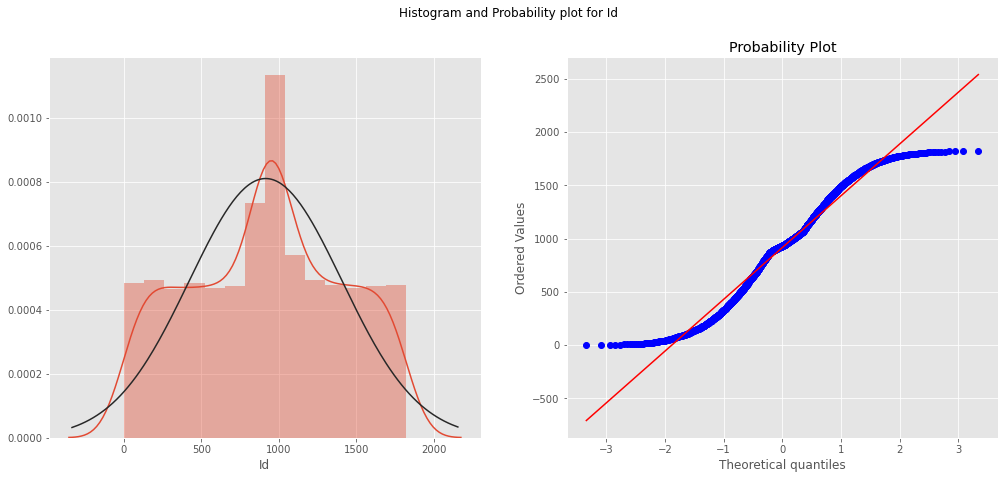

In [76]:
uni_var_analysis('Id')

Relationship between Id and Property_Sale_Price

description    Identification number of the property
Name: Id, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.004


Lets see the relation between Id and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.013313745180993385
Intercept:  0.22108172280652405
R-value:  -0.009071501175692852
p-value:  0.7121308113710663
Std error:  0.03607482309021397


Fail to reject Null hypothesis,  Slope is 0 (The regression model has no predictability of the dependent variable)


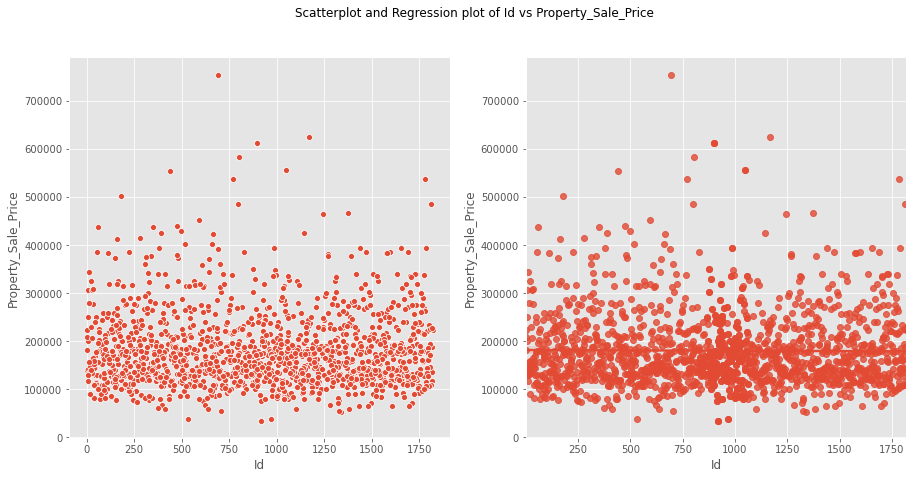

In [77]:
bi_var_analysis('Id')

In [ ]:
# Using commonsense we know that id cannot be a predictor. The same thing can be found out from the data.

#### Dwell_Type

Basic EDA of Dwell_Type

description    Identifies the type of dwelling involved in the sale
Name: Dwell_Type, dtype: object




There are 123 outliers in the Dwell_Type column.


Skewness:  37.308629074927524
Kurtosis:  1474.0893622421545


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.089
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


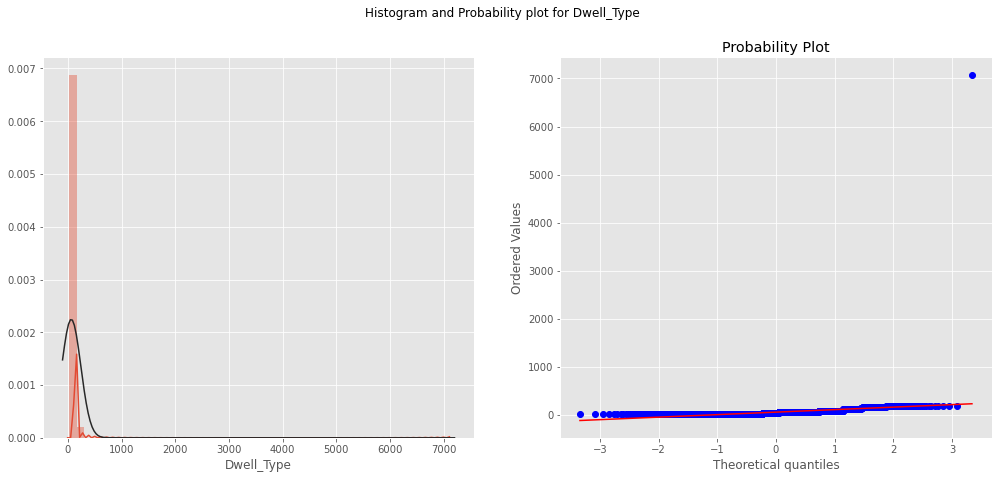

In [78]:
uni_var_analysis('Dwell_Type')

Relationship between Dwell_Type and Property_Sale_Price

description    Identifies the type of dwelling involved in the sale
Name: Dwell_Type, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.003


Lets see the relation between Dwell_Type and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.005293165637255953
Intercept:  0.22259898159499067
R-value:  -0.02009758013720477
p-value:  0.4136069771496206
Std error:  0.006472692719409336


Fail to reject Null hypothesis,  Slope is 0 (The regression model has no predictability of the dependent variable)


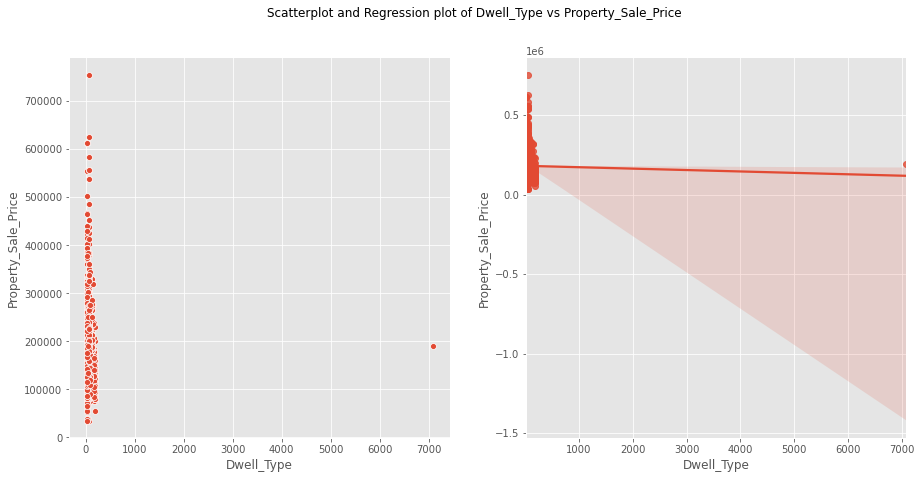

In [79]:
bi_var_analysis('Dwell_Type')

Relationship between Dwell_Type and Property_Sale_Price

description    Identifies the type of dwelling involved in the sale
Name: Dwell_Type, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.004


Lets see the relation between Dwell_Type and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.1064406885667356
Intercept:  0.23672349348274946
R-value:  -0.09635297631167164
p-value:  8.595284406160412e-05
Std error:  0.027036433392974703


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


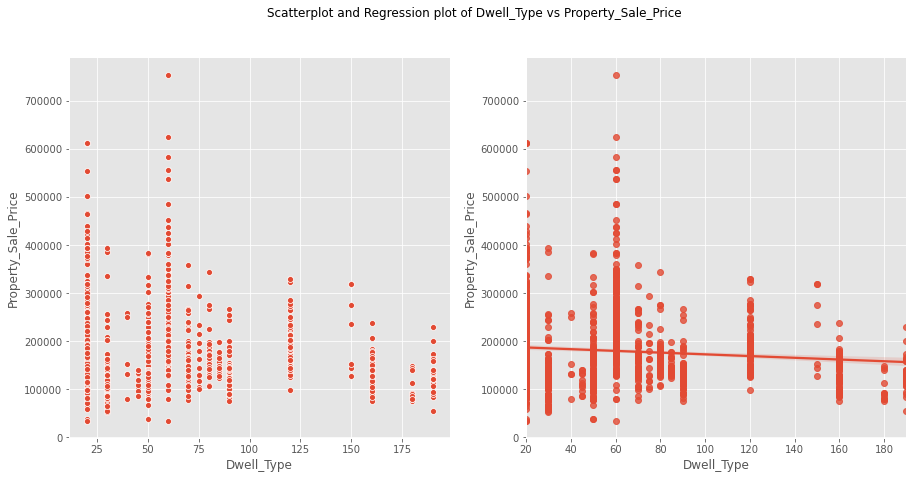

In [80]:
# Lets try to remove the outliers and do a bivariate analysis
X_eda_dwell = X_eda[X_eda['Dwell_Type']<500]
bi_var_analysis('Dwell_Type', X_eda_dwell)

In [81]:
X_eda['Dwell_Type']

1432    30
1568    20
1044    20
175     20
1611    60
        ..
1639    80
1095    20
1130    50
1294    20
860     50
Name: Dwell_Type, Length: 1657, dtype: int64

Relationship between Dwell_Type and Property_Sale_Price

description    Identifies the type of dwelling involved in the sale
Name: Dwell_Type, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Dwell_Type are : [30 20 60 50 120 160 45 90 190 85 80 70 75 180 150 40]


Ho:  All the levels in Dwell_Type have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Dwell_Type with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df          F        PR(>F)
C(Dwell_Type)  2.126343e+12  15.0    28.604539  3.085534e-72
Residual       8.127389e+12  1640.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of Dwell_Type with respect to Property_Sale_Price mean


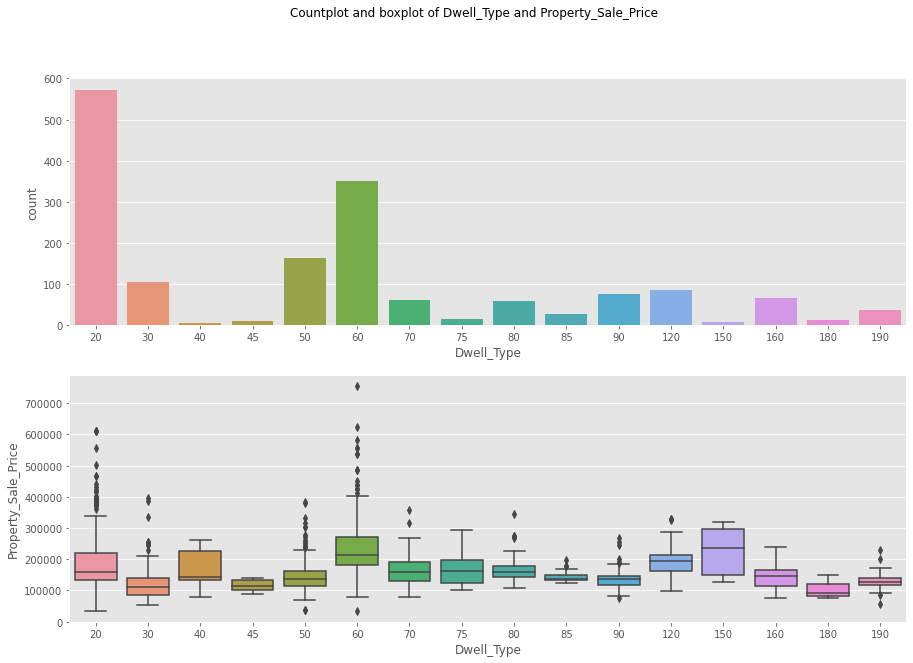

In [82]:
# It looks like there is no continuity in the data. So lets convert this variable to a categorical variable.

bi_var_analysis('Dwell_Type', X_eda_dwell, convert=True)

Dwell_Type: Identifies the type of dwelling involved in the sale 
20 1-STORY 1946 & NEWER ALL STYLES 
30 1-STORY 1945 & OLDER 
40 1-STORY W/FINISHED ATTIC ALL AGES 
45 1-1/2 STORY - UNFINISHED ALL AGES 
50 1-1/2 STORY FINISHED ALL AGES 
60 2-STORY 1946 & NEWER 
70 2-STORY 1945 & OLDER 
75 2-1/2 STORY ALL AGES 
80 SPLIT OR MULTI-LEVEL 
85 SPLIT FOYER 
90 DUPLEX - ALL STYLES AND AGES 
120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER 
150 1-1/2 STORY PUD - ALL AGES 
160 2-STORY PUD - 1946 & NEWER 
180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER 
190 2 FAMILY CONVERSION - ALL STYLES AND AGES

In [ ]:
X_eda_dwell

In [137]:
X_eda_dwell.dtypes

Id                     int64  
Dwell_Type             int64  
Zone_Class             object 
LotFrontage            float64
LotArea                int64  
Road_Type              object 
Property_Shape         object 
LandContour            object 
Utilities              object 
LotConfig              object 
LandSlope              object 
Neighborhood           object 
Condition1             object 
Condition2             object 
Dwelling_Type          object 
HouseStyle             object 
OverallQual            int64  
OverallCond            int64  
YearBuilt              int64  
YearRemodAdd           int64  
RoofStyle              object 
RoofMatl               object 
Exterior1st            object 
Exterior2nd            object 
MasVnrType             object 
MasVnrArea             float64
ExterQual              object 
ExterCond              object 
Foundation             object 
BsmtQual               object 
BsmtCond               object 
BsmtExposure           object 
BsmtFinT

Relationship between Dwell_Type and Property_Sale_Price

description    Identifies the type of dwelling involved in the sale
Name: Dwell_Type, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.004


Lets see the relation between Dwell_Type and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.1064406885667356
Intercept:  0.23672349348274946
R-value:  -0.09635297631167164
p-value:  8.595284406160412e-05
Std error:  0.027036433392974703


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


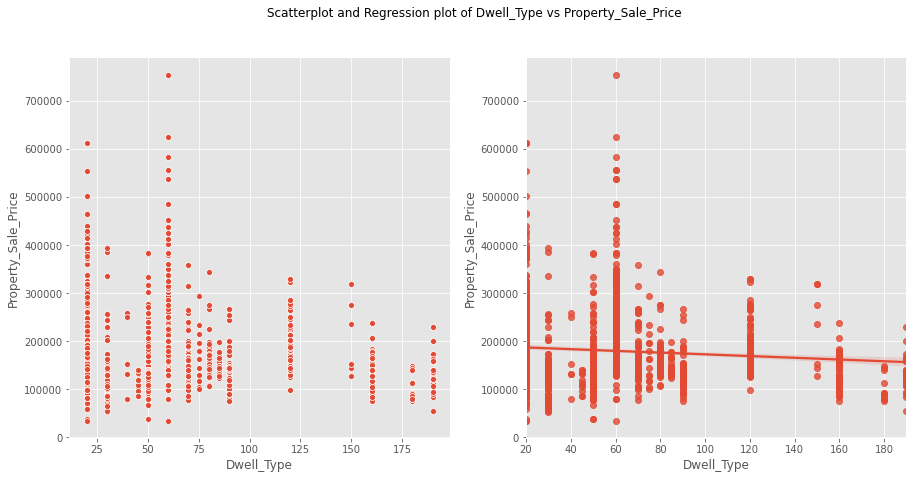

In [136]:
bi_var_analysis('Dwell_Type', X_eda_dwell)

#### Zone_Class

In [ ]:
uni_var_analysis('Zone_Class')

In [ ]:
bi_var_analysis('Zone_Class')

#### LotFrontage

In [ ]:
uni_var_analysis('LotFrontage')

In [ ]:
bi_var_analysis('LotFrontage')

#### LotArea

In [ ]:
uni_var_analysis('LotArea')

In [ ]:
bi_var_analysis('LotArea')

#### Road_Type

In [ ]:
uni_var_analysis('Road_Type')

In [ ]:
bi_var_analysis('Road_Type')

#### Property_Shape

In [ ]:
uni_var_analysis('Property_Shape')

In [ ]:
bi_var_analysis('Property_Shape')

#### LandContour

In [ ]:
uni_var_analysis('LandContour')

In [ ]:
bi_var_analysis('LandContour')

#### Utilities

In [ ]:
uni_var_analysis('Utilities')

In [ ]:
bi_var_analysis('Utilities')

#### LotConfig

In [ ]:
uni_var_analysis('LotConfig')

In [ ]:
bi_var_analysis('LotConfig')

#### LandSlope

In [ ]:
uni_var_analysis('LandSlope')

In [ ]:
bi_var_analysis('LandSlope')

#### Neighborhood

In [ ]:
uni_var_analysis('Neighborhood')

In [ ]:
bi_var_analysis('Neighborhood')

#### Condition1

In [ ]:
uni_var_analysis('Condition1')

In [ ]:
bi_var_analysis('Condition1')

#### Condition2

In [ ]:
uni_var_analysis('Condition2')

In [ ]:
bi_var_analysis('Condition2')

#### Dwelling_Type

In [ ]:
uni_var_analysis('Dwelling_Type')

In [ ]:
bi_var_analysis('Dwelling_Type')

#### HouseStyle

In [ ]:
uni_var_analysis('HouseStyle')

In [ ]:
bi_var_analysis('HouseStyle')

#### OverallQual

In [ ]:
uni_var_analysis('OverallQual')

In [ ]:
bi_var_analysis('OverallQual')

#### OverallCond

In [ ]:
uni_var_analysis('OverallCond')

In [ ]:
bi_var_analysis('OverallCond')

#### YearBuilt

In [ ]:
uni_var_analysis('YearBuilt')

In [ ]:
bi_var_analysis('YearBuilt')

#### YearRemodAdd

In [ ]:
uni_var_analysis('YearRemodAdd')

In [ ]:
bi_var_analysis('YearRemodAdd')

#### RoofStyle

In [ ]:
uni_var_analysis('RoofStyle')

In [ ]:
bi_var_analysis('RoofStyle')

#### RoofMatl

In [ ]:
uni_var_analysis('RoofMatl')

In [ ]:
bi_var_analysis('RoofMatl')

#### Exterior1st

In [ ]:
uni_var_analysis('Exterior1st')

In [ ]:
bi_var_analysis('Exterior1st')

#### Exterior2nd

In [ ]:
uni_var_analysis('Exterior2nd')

In [ ]:
bi_var_analysis('Exterior2nd')

#### MasVnrType

In [ ]:
uni_var_analysis('MasVnrType')

In [ ]:
bi_var_analysis('MasVnrType')

#### MasVnrArea

In [ ]:
uni_var_analysis('MasVnrArea')

In [ ]:
bi_var_analysis('MasVnrArea')

#### ExterQual

In [ ]:
uni_var_analysis('ExterQual')

In [ ]:
bi_var_analysis('ExterQual')

#### ExterCond

In [ ]:
uni_var_analysis('ExterCond')

In [ ]:
bi_var_analysis('ExterCond')

#### Foundation

In [ ]:
uni_var_analysis('Foundation')

In [ ]:
bi_var_analysis('Foundation')

#### BsmtQual

In [ ]:
uni_var_analysis('BsmtQual')

In [ ]:
bi_var_analysis('BsmtQual')

#### BsmtCond

In [ ]:
uni_var_analysis('BsmtCond')

In [ ]:
bi_var_analysis('BsmtCond')

#### BsmtExposure

In [ ]:
uni_var_analysis('BsmtExposure')

In [ ]:
bi_var_analysis('BsmtExposure')

#### BsmtFinType1

In [ ]:
uni_var_analysis('BsmtFinType1')

In [ ]:
bi_var_analysis('BsmtFinType1')

#### BsmtFinSF1

In [ ]:
uni_var_analysis('BsmtFinSF1')

In [ ]:
bi_var_analysis('BsmtFinSF1')

#### BsmtFinType2

In [ ]:
uni_var_analysis('BsmtFinType2')

In [ ]:
bi_var_analysis('BsmtFinType2')

#### BsmtFinSF2

In [ ]:
uni_var_analysis('BsmtFinSF2')

In [ ]:
bi_var_analysis('BsmtFinSF2')

#### BsmtUnfSF

In [ ]:
uni_var_analysis('BsmtUnfSF')

In [ ]:
bi_var_analysis('BsmtUnfSF')

#### TotalBsmtSF

In [ ]:
uni_var_analysis('TotalBsmtSF')

In [ ]:
bi_var_analysis('TotalBsmtSF')

#### Heating

In [ ]:
uni_var_analysis('Heating')

In [ ]:
bi_var_analysis('Heating')

#### HeatingQC

In [ ]:
uni_var_analysis('HeatingQC')

In [ ]:
bi_var_analysis('HeatingQC')

#### CentralAir

In [ ]:
uni_var_analysis('CentralAir')

In [ ]:
bi_var_analysis('CentralAir')

#### Electrical

In [ ]:
uni_var_analysis('Electrical')

In [ ]:
bi_var_analysis('Electrical')

#### 1stFlrSF

In [ ]:
uni_var_analysis('1stFlrSF')

In [ ]:
bi_var_analysis('1stFlrSF')

#### 2ndFlrSF

In [ ]:
uni_var_analysis('2ndFlrSF')

In [ ]:
bi_var_analysis('2ndFlrSF')

#### LowQualFinSF

In [ ]:
uni_var_analysis('LowQualFinSF')

In [ ]:
bi_var_analysis('LowQualFinSF')

#### GrLivArea

In [ ]:
uni_var_analysis('GrLivArea')

In [ ]:
bi_var_analysis('GrLivArea')

#### BsmtFullBath

In [ ]:
uni_var_analysis('BsmtFullBath')

In [ ]:
bi_var_analysis('BsmtFullBath')

#### BsmtHalfBath

In [ ]:
uni_var_analysis('BsmtHalfBath')

In [ ]:
bi_var_analysis('BsmtHalfBath')

#### FullBath

In [ ]:
uni_var_analysis('FullBath')

In [ ]:
bi_var_analysis('FullBath')

#### HalfBath

In [ ]:
uni_var_analysis('HalfBath')

In [ ]:
bi_var_analysis('HalfBath')

#### BedroomAbvGr

In [ ]:
df_desc.loc['BedroomAbvGr']

In [ ]:
uni_var_analysis('BedroomAbvGr')

In [ ]:
bi_var_analysis('BedroomAbvGr')

#### KitchenAbvGr

In [ ]:
uni_var_analysis('KitchenAbvGr')

In [ ]:
bi_var_analysis('KitchenAbvGr')

#### KitchenQual

In [ ]:
uni_var_analysis('KitchenQual')

In [ ]:
bi_var_analysis('KitchenQual')

#### TotRmsAbvGrd

In [ ]:
uni_var_analysis('TotRmsAbvGrd')

In [ ]:
bi_var_analysis('TotRmsAbvGrd')

#### Functional

In [ ]:
uni_var_analysis('Functional')

In [ ]:
bi_var_analysis('Functional')

#### Fireplaces

In [ ]:
uni_var_analysis('Fireplaces')

In [ ]:
bi_var_analysis('Fireplaces')

#### GarageType

In [ ]:
uni_var_analysis('GarageType')

In [ ]:
bi_var_analysis('GarageType')

#### GarageYrBlt

In [ ]:
uni_var_analysis('GarageYrBlt')

In [ ]:
bi_var_analysis('GarageYrBlt')

#### GarageFinish

In [ ]:
uni_var_analysis('GarageFinish')

In [ ]:
bi_var_analysis('GarageFinish')

#### GarageCars

In [ ]:
uni_var_analysis('GarageCars')

In [ ]:
bi_var_analysis('GarageCars')

#### GarageArea

In [ ]:
uni_var_analysis('GarageArea')

In [ ]:
bi_var_analysis('GarageArea')

#### GarageQual

In [ ]:
uni_var_analysis('GarageQual')

In [ ]:
bi_var_analysis('GarageQual')

#### GarageCond

In [ ]:
uni_var_analysis('GarageCond')

In [ ]:
bi_var_analysis('GarageCond')

#### PavedDrive

In [ ]:
uni_var_analysis('PavedDrive')

In [ ]:
bi_var_analysis('PavedDrive')

#### WoodDeckSF

In [ ]:
uni_var_analysis('WoodDeckSF')

In [ ]:
bi_var_analysis('WoodDeckSF')

#### OpenPorchSF

In [ ]:
uni_var_analysis('OpenPorchSF')

In [ ]:
bi_var_analysis('OpenPorchSF')

#### EnclosedPorch

In [ ]:
uni_var_analysis('EnclosedPorch')

In [ ]:
bi_var_analysis('EnclosedPorch')

#### 3SsnPorch

In [ ]:
uni_var_analysis('3SsnPorch')

In [ ]:
bi_var_analysis('3SsnPorch')

#### ScreenPorch

In [ ]:
uni_var_analysis('ScreenPorch')

In [ ]:
bi_var_analysis('ScreenPorch')

#### PoolArea

In [ ]:
uni_var_analysis('PoolArea')

In [ ]:
bi_var_analysis('PoolArea')

#### MiscVal

In [ ]:
uni_var_analysis('MiscVal')

In [ ]:
bi_var_analysis('MiscVal')

#### MoSold

In [ ]:
uni_var_analysis('MoSold')

In [ ]:
bi_var_analysis('MoSold')

#### YrSold

In [ ]:
uni_var_analysis('YrSold')

In [ ]:
bi_var_analysis('YrSold')

#### SaleType

In [ ]:
uni_var_analysis('SaleType')

In [ ]:
bi_var_analysis('SaleType')

#### SaleCondition

In [ ]:
uni_var_analysis('SaleCondition')

In [ ]:
bi_var_analysis('SaleCondition')

#### Property_Sale_Price

In [ ]:
uni_var_analysis('Property_Sale_Price')

In [ ]:
bi_var_analysis('Property_Sale_Price')

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(X_eda.corr(), vmin=-1)
plt.savefig('plots/heatmap_of_all_numeric_features.png')

In [ ]:
X_eda.corr().loc['Property_Sale_Price'].sort_values()

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=X_eda.corr().loc['Property_Sale_Price'].sort_values().values,
            y=X_eda.corr().loc['Property_Sale_Price'].sort_values().index.values)
plt.title('Correlation with dependent variable')
plt.xlabel('Correlation')
plt.savefig('plots/correlation_with_dependent_variable.png')

In [ ]:
correlation

In [ ]:
action

### Model 1

In [ ]:
num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
num_cols

In [ ]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
cat_cols

In [ ]:
ct = ColumnTransformer([
    ('num_scaling', RobustScaler(), num_cols),
    ('cat_encoding', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
])

In [ ]:
x_train = ct.fit_transform(X_train)

In [ ]:
x_test = ct.transform(X_test)

In [ ]:
x_sm = x_train
x_sm = sm.add_constant(x_sm)
mlm = sm.OLS(y_train, x_sm).fit()
print(mlm.summary())

In [ ]:
models = {
    'model no' : [],
    'no of independent features' : [],
    'r^2 value' : []
}

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
sns.distplot(y_test - y_pred)

In [ ]:
lm.score(x_train,y_train)

In [ ]:
# lm.score(x_test, y_test)

In [ ]:
models['model no'].append(1)
models['no of independent features'].append(x_train.shape[1])
models['r^2 value'].append(lm.score(x_train,y_train))

### Model 2

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:

col_to_drop = correlation['low(0-3)'].union(action['drop'])
X_train_new = X_train.drop(col_to_drop, axis=1)
X_test_new = X_test.drop(col_to_drop, axis=1)
    
col_to_power = []
for col in action['power_t']:
    if col not in col_to_drop:
        col_to_power.append(col)
            
col_to_quantile = []
for col in action['quantile_t']:
    if col == 'Property_Sale_Price':
        continue
    elif col not in col_to_drop:
        col_to_quantile.append(col)
            
col_to_ohe = []
for col in action['one_hot']:
    if col not in col_to_drop:
        col_to_ohe.append(col)
            
col_tran = ColumnTransformer([
    ('power_tran', PowerTransformer(), col_to_power),
    ('quan_tran', QuantileTransformer(), col_to_quantile),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), col_to_ohe)
])
    
X_train_trans = col_tran.fit_transform(X_train_new)
X_test_trans = col_tran.transform(X_test_new)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_trans, y_train)

In [ ]:
y_pred = lm2.predict(X_test_trans)

In [ ]:
lm2.score(X_train_trans, y_train)

In [ ]:
# lm2.score(X_test_trans, y_test)

In [ ]:
models['model no'].append(2)
models['no of independent features'].append(X_train_trans.shape[1])
models['r^2 value'].append(lm2.score(X_train_trans, y_train))

In [ ]:
model_comparison = pd.DataFrame(models)

In [ ]:
model_comparison